In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Merge the two datas to create one dataframe

In [2]:
zd=pd.read_csv('zomato.csv',encoding='latin1')
cc=pd.read_csv('Country-Code.csv')

In [3]:
df=zd.merge(cc, how='left')
df.shape

(9551, 22)

In [4]:
# Droping colums not required

In [5]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3670,2653,Cocoberry,1,New Delhi,"S-5, Ground Floor, M Block Market, Greater Kai...",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",77.233066,28.550173,Desserts,...,No,Yes,No,No,1,3.9,Yellow,Good,155,India
7335,9099,Republic of Chicken,1,New Delhi,"Leela Ram Masjid Moth, NDMC, South Extension 2...",South Extension 2,"South Extension 2, New Delhi",77.219403,28.564190,"Raw Meats, Fast Food",...,No,No,No,No,1,2.8,Orange,Average,13,India
470,18482983,The Lokal,184,Singapore,136 Neil Road 088865,"Neil Road, Outram","Neil Road, Outram, Singapore",103.840921,1.278373,"Singaporean, Australian, German",...,No,No,No,No,4,3.1,Orange,Average,33,Singapore
6346,468,Karim's,1,New Delhi,"1-2/5, Sagar Complex, New Rajdhani Enclave, Vi...",Preet Vihar,"Preet Vihar, New Delhi",77.296464,28.642720,"Mughlai, North Indian",...,No,Yes,No,No,2,2.5,Orange,Average,84,India
3401,18424636,Kake Di Chap,1,New Delhi,"F 196 A, LIG Flats, Shop 2 & 3, Pocket F, Dils...",Dilshad Garden,"Dilshad Garden, New Delhi",77.317410,28.680408,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,2,India


In [6]:
df=df.drop(['Country Code','Locality','Switch to order menu','Rating color', 'Address'],axis=1)

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [8]:
df.shape

(9551, 17)

In [9]:
# droping duplicate values

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(9551, 17)

In [12]:
# checking th null values 

In [13]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [17]:
df.head()

,Restaurant ID,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines


In [18]:
df.value_counts('Cuisines')

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Continental, Italian, North Indian, Lebanese, Thai         1
Continental, Italian, North Indian, Lebanese               1
Continental, Italian, North Indian, Chinese, Lebanese      1
Continental, Italian, North Indian, Chinese                1
World Cuisine, Patisserie, Cafe                            1
Length: 1825, dtype: int64

In [19]:
df.value_counts('Rating text')

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
dtype: int64

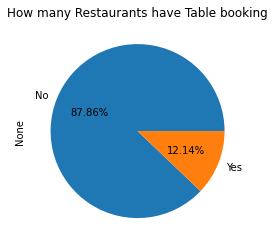

In [20]:
df.value_counts('Has Table booking').plot(kind='pie', autopct='%1.2f%%');
plt.title('How many Restaurants have Table booking')
plt.show()

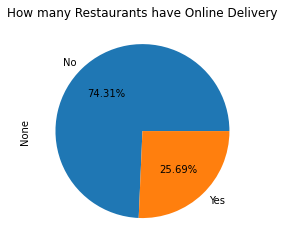

In [21]:
df.value_counts('Has Online delivery').plot(kind='pie', autopct='%1.2f%%');
plt.title('How many Restaurants have Online Delivery')
plt.show()

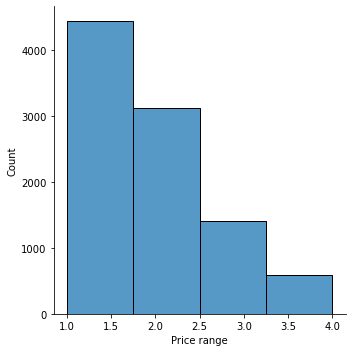

In [22]:
sns.displot(x='Price range',data=df,bins=4)